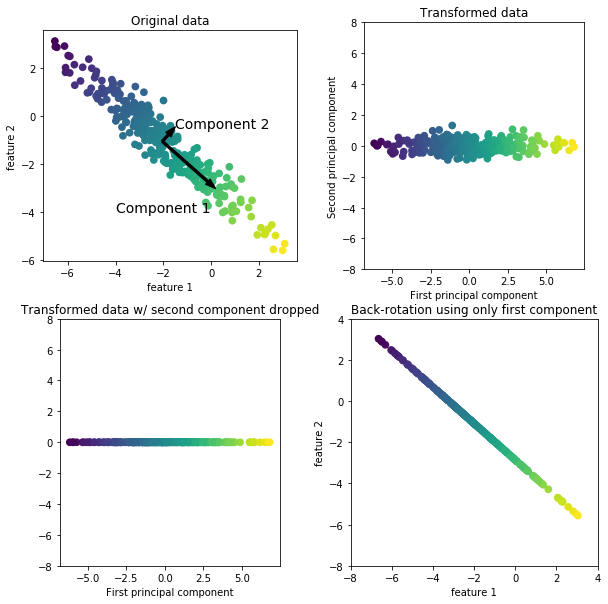

In [2]:
#PCA(주성분 분석) 처리 방법을 설명 가능한 코드 구현해보기

import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_pca_illustration()

## ex08_nonPCA

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

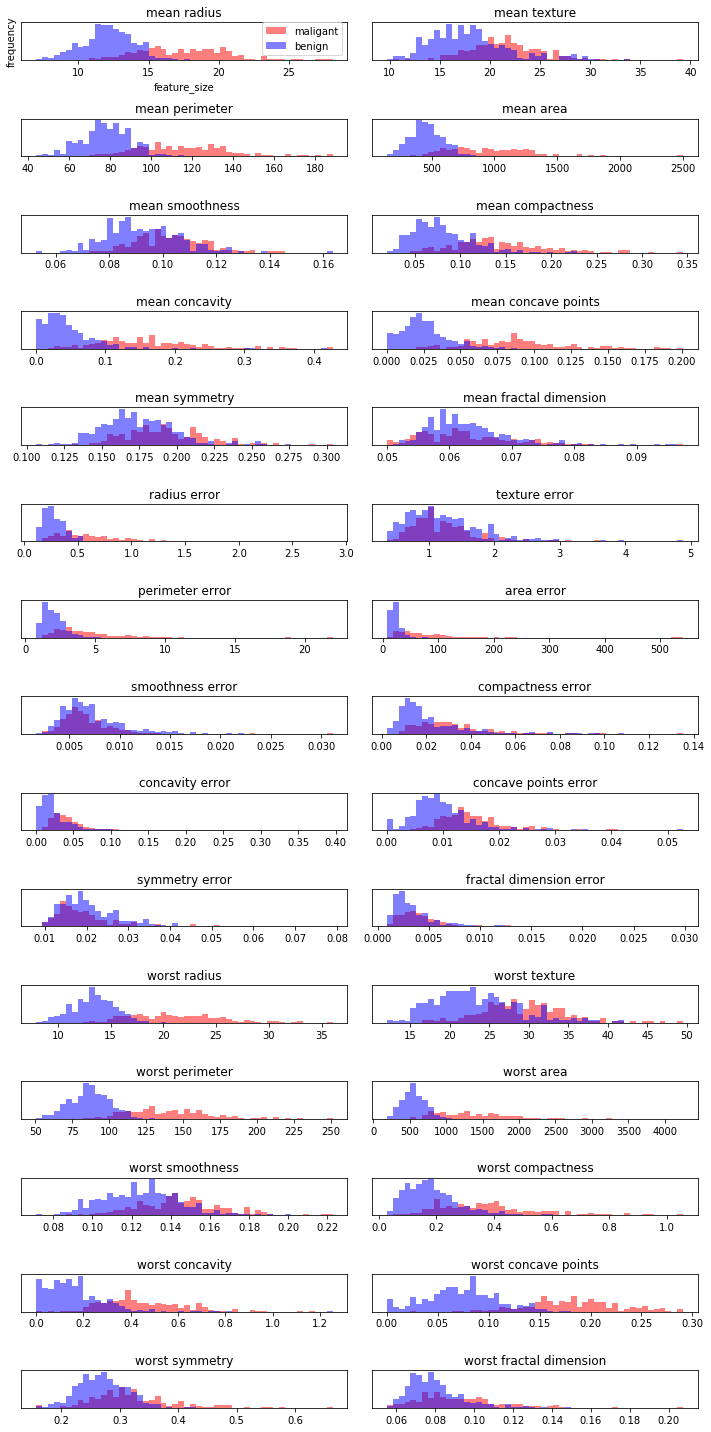

In [6]:
# 유방암 진단 데이터 셋을 사용해 환자가 음성/양성인지 확인
# pca 미적용된 test예제
# 목적 : 유방암 진단 데이터셋 시각화해보기

import mglearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

# 한글 보이게 하는 설정
'''
font_location = 'C:/Windows/fonts/malgun.ttf'
font_name = font_manager.FontProperties(font = font_location).get_name()
matplotlib.rc('font', family = font_name)
'''

# 타겟 0 => 악성 / 타겟1 => 양성
cancer = load_breast_cancer()
print(cancer)

# 변수 30개, 그래프 띄울 때, 15 x 2로 객체 생성

fig, axes = plt.subplots(15, 2, figsize = (10, 20))

# 악성 데이터
maligant = cancer.data[cancer.target == 0]

# 양성 데이터
benign = cancer.data[cancer.target == 1]


# 다차원 배열을 1차원 배열로 재구성
ax = axes.ravel()


# histogram 그리기
# bin : 막대그래프에서 x축의 폭 또는 interval, cell, 구간

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins = 50)   # _, 은 버려지는 데이터??
    ax[i].hist(maligant[:, i], bins = bins, color = 'r', alpha = 0.5)
    ax[i].hist(benign[:, i], bins = bins, color = 'b', alpha = 0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel('feature_size')
ax[0].set_ylabel('frequency')
ax[0].legend(['maligant', 'benign'], loc = 'best')

fig.tight_layout()

(569, 2)


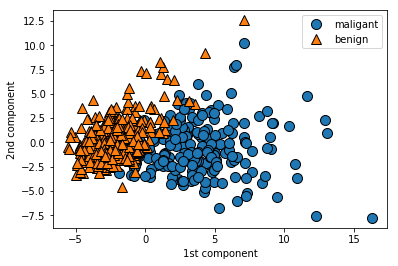

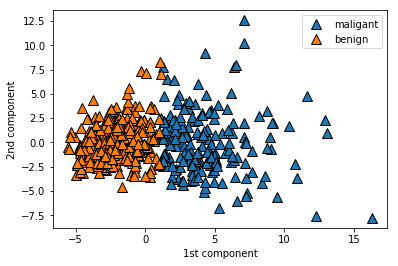

In [8]:

import mglearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

cancer = load_breast_cancer()
# 1단계 pca 적용전에 각 특성의 분산이 1이 되도록 데이터의 스케일 조정

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_Scaled=scaler.transform(cancer.data)

# 2단계 : PCA 적용, 두개의 주성분만 유지하는 데이터로 변환(차원 축소)
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca.fit(X_Scaled)

X_pca=pca.transform(X_Scaled)

print(X_pca.shape)

# 3단계 : 시각화 (산점도. 악성:0, 양성:1) 
import mglearn
import matplotlib.pyplot as plt 

mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['maligant', 'benign'], loc="best")
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

# 4단계 : cacner.target 사용하지 않고 주성분 두가지로 군집화
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=2)
kmeans.fit(X_Scaled)
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], kmeans.labels_, markers='^') # KMeans.labels_ 에서 언더바 쓰면 각각 특성이 반영됨
plt.legend(['maligant', 'benign'], loc="best")
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()



In [ ]:

import mglearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

cancer = load_breast_cancer()

# 1단계 pca 적용전에 각 특성의 분산이 1이 되도록 데이터의 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_Scaled=scaler.transform(cancer.data)

# 2단계 : PCA 적용, 두개의 주성분만 유지하는 데이터로 변환(차원 축소)
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca.fit(X_Scaled)

X_pca=pca.transform(X_Scaled)

print(X_pca.shape)

# 3단계 : 시각화 (산점도. 악성:0, 양성:1) 
import mglearn
import matplotlib.pyplot as plt 

mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['maligant', 'benign'], loc="best")
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()
